In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PolynomialFeatures
from io import StringIO
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import time
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 2. Load the datasetata = "usedcars.csv"
data = 'usedcars.csv'
df = pd.read_csv(data)
df['price'] = df['price']/1000
df['mileage'] = df['mileage']/1000

In [3]:
df.head()

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
0,2.988,320,f,193.296,1995,Black,3.2,Gasoline,SoA,unsp,Alloy
1,6.595,320,f,129.948,1995,other,3.2,Gasoline,Mid,Premium,Alloy
2,7.993,320,f,140.428,1997,White,3.2,Gasoline,Mid,Bose,Alloy
3,5.995,420,f,113.622,1999,Silver,4.2,Gasoline,Mid,unsp,Alloy
4,3.000,420,f,167.673,1999,Silver,4.2,Gasoline,SoA,unsp,Alloy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20063 entries, 0 to 20062
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         20063 non-null  float64
 1   trim          20063 non-null  object 
 2   isOneOwner    20063 non-null  object 
 3   mileage       20063 non-null  float64
 4   year          20063 non-null  int64  
 5   color         20063 non-null  object 
 6   displacement  20063 non-null  float64
 7   fuel          20063 non-null  object 
 8   region        20063 non-null  object 
 9   soundSystem   20063 non-null  object 
 10  wheelType     20063 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.7+ MB


In [5]:
df.isna().sum()

price           0
trim            0
isOneOwner      0
mileage         0
year            0
color           0
displacement    0
fuel            0
region          0
soundSystem     0
wheelType       0
dtype: int64

In [6]:
df.describe()

,price,mileage,year,displacement
count,20063.000000,20063.000000,20063.000000,20063.000000
mean,30.747244,73.113479,2007.010018,5.058964
std,18.291085,43.075537,4.128162,0.628131
min,0.599000,0.008000,1994.000000,3.000000
25%,13.495000,39.888500,2004.000000,4.600000
50%,29.454000,67.187000,2007.000000,5.500000
75%,43.995000,98.213000,2010.000000,5.500000
max,79.999000,488.525000,2014.000000,6.300000


In [7]:
features = ['trim', 'isOneOwner', 'year', 'color', 'displacement', 'fuel', 'region', 'soundSystem', 'wheelType']
for feature in features:
  print(feature)
  print(df[feature].value_counts())
  print()

trim
550       11825
430        2787
500        2661
63 AMG      599
600         572
55 AMG      356
350         352
320         274
420         239
400         220
65 AMG      178
Name: trim, dtype: int64

isOneOwner
f    16594
t     3469
Name: isOneOwner, dtype: int64

year
2007    3607
2008    2352
2012    1872
2011    1625
2010    1624
2013    1169
2006    1056
2009     996
2003     911
2002     903
2004     847
2000     823
2001     789
2005     685
1995     224
1999     170
1997     142
1996     106
1998      93
1994      64
2014       5
Name: year, dtype: int64

color
Black     8194
Silver    4353
White     2641
Gray      2168
other      961
Blue       914
unsp       832
Name: color, dtype: int64

displacement
5.5    9561
4.6    2794
4.3    2787
5.0    2661
6.3     494
5.4     356
3.2     274
4.2     239
3.5     227
6.0     213
3.0     204
3.7     141
5.8     112
Name: displacement, dtype: int64

fuel
Gasoline    19632
Hybrid        220
Diesel        211
Name: fuel, dtype: int64

In [8]:
df.replace("unsp", float("NaN"), inplace=True) 
df.isna().sum()

price              0
trim               0
isOneOwner         0
mileage            0
year               0
color            832
displacement       0
fuel               0
region             0
soundSystem     9100
wheelType       8404
dtype: int64

In [9]:
# 3. Handle missing values using MICE imputer with ordinal encoding for categorical columns
categorical_columns = ["trim", "isOneOwner", "color", "fuel", "region", "soundSystem", "wheelType"]
numeric_columns = ["mileage", "year", "displacement"]
output = "price"
# columns_with_missing_values = ["color", "soundSystem", "wheelType"]
columns_with_missing_values = ["color"]

# Convert categorical columns with missing values to numerical columns using ordinal encoding
ordinal_encoder = OrdinalEncoder()
df[columns_with_missing_values] = ordinal_encoder.fit_transform(df[columns_with_missing_values])

In [10]:
df

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
0,2.988,320,f,193.296,1995,0.0,3.2,Gasoline,SoA,NaN,Alloy
1,6.595,320,f,129.948,1995,5.0,3.2,Gasoline,Mid,Premium,Alloy
2,7.993,320,f,140.428,1997,4.0,3.2,Gasoline,Mid,Bose,Alloy
3,5.995,420,f,113.622,1999,3.0,4.2,Gasoline,Mid,NaN,Alloy
4,3.000,420,f,167.673,1999,3.0,4.2,Gasoline,SoA,NaN,Alloy
...,...,...,...,...,...,...,...,...,...,...,...
20058,67.950,550,t,17.181,2013,0.0,4.6,Gasoline,WSC,Harman Kardon,Alloy
20059,31.995,400,t,53.885,2010,0.0,3.5,Hybrid,SoA,NaN,NaN
20060,34.995,400,f,47.484,2010,0.0,3.5,Hybrid,WSC,NaN,Alloy
20061,38.991,400,f,42.972,2010,4.0,3.5,Hybrid,SoA,NaN,Alloy


In [11]:
# Define the imputer
# cols_to_impute = ['color', 'soundSystem', 'wheelType']
cols_to_impute = ['color']
imputer = IterativeImputer(max_iter=10)
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

In [12]:
# Convert the numerical columns back to categorical columns
df[cols_to_impute] = ordinal_encoder.inverse_transform(df[cols_to_impute])

In [13]:
df.head()

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
0,2.988,320,f,193.296,1995,Black,3.2,Gasoline,SoA,NaN,Alloy
1,6.595,320,f,129.948,1995,other,3.2,Gasoline,Mid,Premium,Alloy
2,7.993,320,f,140.428,1997,White,3.2,Gasoline,Mid,Bose,Alloy
3,5.995,420,f,113.622,1999,Silver,4.2,Gasoline,Mid,NaN,Alloy
4,3.000,420,f,167.673,1999,Silver,4.2,Gasoline,SoA,NaN,Alloy


In [14]:
df.isna().sum()

price              0
trim               0
isOneOwner         0
mileage            0
year               0
color              0
displacement       0
fuel               0
region             0
soundSystem     9100
wheelType       8404
dtype: int64

In [15]:
features = ['trim', 'isOneOwner', 'year', 'color', 'displacement', 'fuel', 'region', 'soundSystem', 'wheelType']
for feature in features:
  print(feature)
  print(df[feature].value_counts())
  print()

trim
550       11825
430        2787
500        2661
63 AMG      599
600         572
55 AMG      356
350         352
320         274
420         239
400         220
65 AMG      178
Name: trim, dtype: int64

isOneOwner
f    16594
t     3469
Name: isOneOwner, dtype: int64

year
2007    3607
2008    2352
2012    1872
2011    1625
2010    1624
2013    1169
2006    1056
2009     996
2003     911
2002     903
2004     847
2000     823
2001     789
2005     685
1995     224
1999     170
1997     142
1996     106
1998      93
1994      64
2014       5
Name: year, dtype: int64

color
Black     8194
Silver    4353
White     2641
Gray      2168
Blue      1746
other      961
Name: color, dtype: int64

displacement
5.5    9561
4.6    2794
4.3    2787
5.0    2661
6.3     494
5.4     356
3.2     274
4.2     239
3.5     227
6.0     213
3.0     204
3.7     141
5.8     112
Name: displacement, dtype: int64

fuel
Gasoline    19632
Hybrid        220
Diesel        211
Name: fuel, dtype: int64

region
SoA   

In [16]:
df.select_dtypes(include='object').nunique()

trim           11
isOneOwner      2
color           6
fuel            3
region          9
soundSystem     4
wheelType       3
dtype: int64

In [17]:
df.select_dtypes(include='int').nunique()

year    21
dtype: int64

In [18]:
df.select_dtypes(include='float').nunique()

price            4992
mileage         18231
displacement       13
dtype: int64

In [19]:
# find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# print the duplicate rows
print("Duplicate Rows except first occurrence based on all columns are:")
print(duplicate_rows)

Duplicate Rows except first occurrence based on all columns are:
        price trim isOneOwner  mileage  year  color  displacement      fuel  \
1508    4.000  430          f   57.453  2004  Black           4.3  Gasoline   
7330    4.500  430          f   72.141  2005  Black           4.3  Gasoline   
13137   2.800  430          f   59.690  2002  Black           4.3  Gasoline   
15708  16.988  600          f   48.501  2002  Black           5.8  Gasoline   

      region soundSystem wheelType  
1508     Mid         NaN       NaN  
7330     Mid         NaN       NaN  
13137    Mid         NaN       NaN  
15708    WNC        Bose     Alloy  


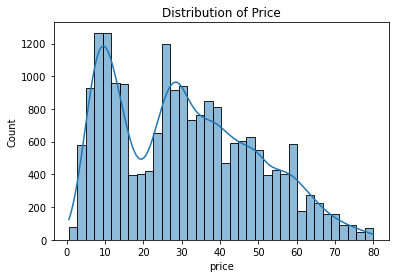

In [20]:
# Distribution plot of the target variable (price)
sns.histplot(data=df, x='price', kde=True)
plt.title('Distribution of Price')
plt.show()

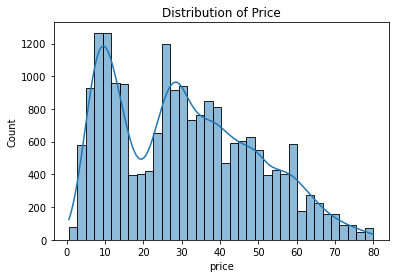

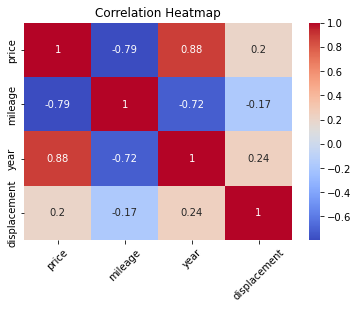

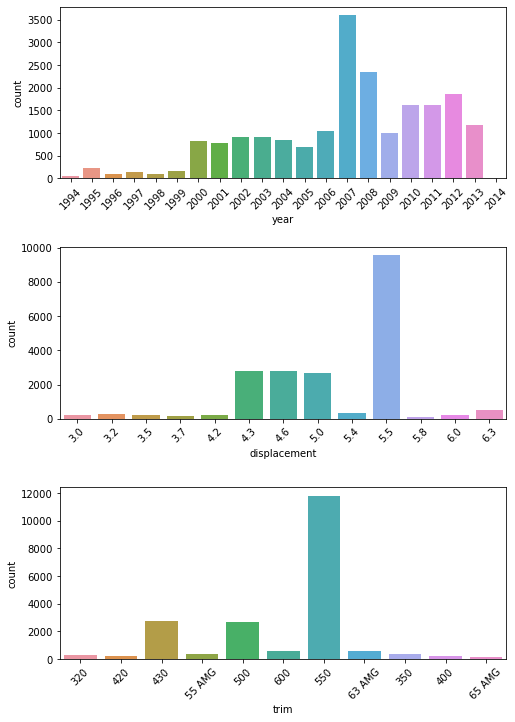

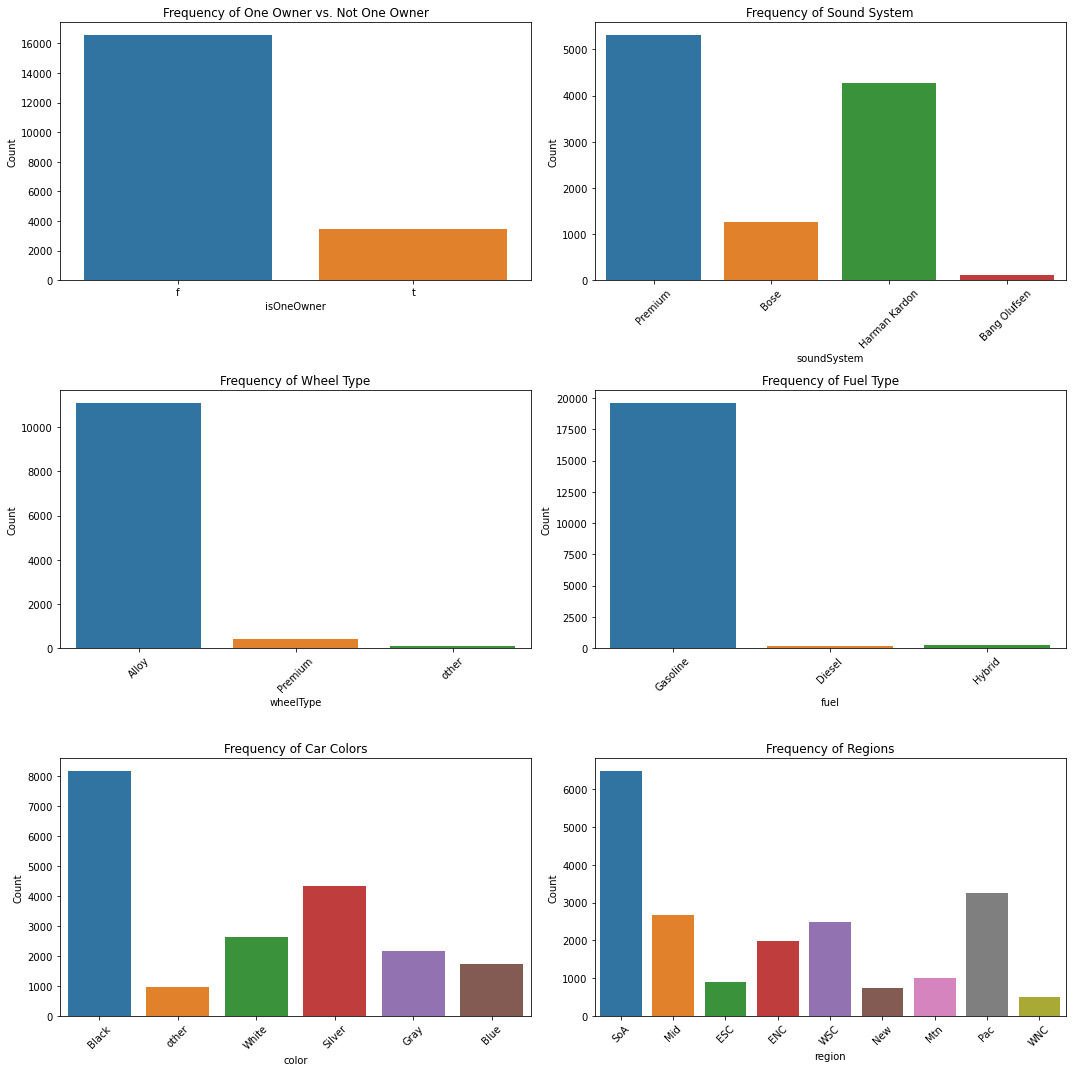

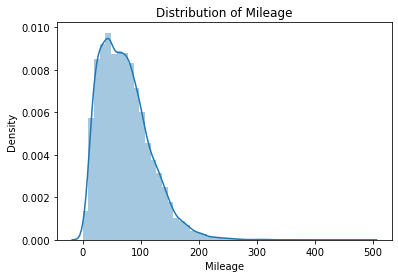

In [21]:

import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

# Distribution plot of the target variable (price)
sns.histplot(data=df, x='price', kde=True)
plt.title('Distribution of Price')
plt.show()

# # Heatmap to visualize the correlations between the target variable and the categorical variables
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.xticks(rotation=45)
plt.title('Correlation Heatmap')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# create the subplots
fig, axs = plt.subplots(nrows=3, figsize=(8, 12))

# plot the first subplot
sns.countplot(data=df, x='year', ax=axs[0])
axs[0].tick_params(axis='x', rotation=45)

# plot the second subplot
sns.countplot(data=df, x='displacement', ax=axs[1])
axs[1].tick_params(axis='x', rotation=45)

# plot the third subplot
sns.countplot(data=df, x='trim', ax=axs[2])
axs[2].tick_params(axis='x', rotation=45)

# adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4)

# display the plot
plt.show()



# # Categorical variables
# fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# sns.countplot(data=df, x='isOneOwner', ax=axs[0])
# axs[0].set_title('Frequency of One Owner vs. Not One Owner')
# axs[0].set_xlabel('isOneOwner')
# axs[0].set_ylabel('Count')

# sns.countplot(data=df, x='soundSystem', ax=axs[1])
# axs[1].set_title('Frequency of Sound System')
# axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
# axs[1].set_xlabel('soundSystem')
# axs[1].set_ylabel('Count')

# sns.countplot(data=df, x='wheelType', ax=axs[2])
# axs[2].set_title('Frequency of Wheel Type')
# axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45)
# axs[2].set_xlabel('wheelType')
# axs[2].set_ylabel('Count')

# plt.tight_layout()
# plt.show()


# Categorical variables
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

sns.countplot(data=df, x='isOneOwner', ax=axs[0,0])
axs[0,0].set_title('Frequency of One Owner vs. Not One Owner')
axs[0,0].set_xlabel('isOneOwner')
axs[0,0].set_ylabel('Count')

sns.countplot(data=df, x='soundSystem', ax=axs[0,1])
axs[0,1].set_title('Frequency of Sound System')
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=45)
axs[0,1].set_xlabel('soundSystem')
axs[0,1].set_ylabel('Count')

sns.countplot(data=df, x='wheelType', ax=axs[1,0])
axs[1,0].set_title('Frequency of Wheel Type')
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=45)
axs[1,0].set_xlabel('wheelType')
axs[1,0].set_ylabel('Count')

sns.countplot(data=df, x='fuel', ax=axs[1,1])
axs[1,1].set_title('Frequency of Fuel Type')
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=45)
axs[1,1].set_xlabel('fuel')
axs[1,1].set_ylabel('Count')

sns.countplot(data=df, x='color', ax=axs[2,0])
axs[2,0].set_title('Frequency of Car Colors')
axs[2,0].set_xticklabels(axs[2,0].get_xticklabels(), rotation=45)
axs[2,0].set_xlabel('color')
axs[2,0].set_ylabel('Count')

sns.countplot(data=df, x='region', ax=axs[2,1])
axs[2,1].set_title('Frequency of Regions')
axs[2,1].set_xticklabels(axs[2,1].get_xticklabels(), rotation=45)
axs[2,1].set_xlabel('region')
axs[2,1].set_ylabel('Count')

plt.tight_layout()
plt.show()


## Mileage 
sns.distplot(df['mileage'])
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.show()

In [22]:
# Convert boolean values in 'isOneOwner' column
df['isOneOwner'] = df['isOneOwner'].map({'f': 0, 't': 1})

In [23]:
# One-hot encoding for categorical features
# categorical_columns = ['trim', 'color', 'fuel', 'region', 'soundSystem', 'wheelType']
# categorical_columns = ['trim', 'color', 'fuel', 'region']
# one_hot_encoder = OneHotEncoder()
# one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_columns])
# one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_columns))

In [24]:
categorical_columns = ['trim', 'color', 'fuel', 'region']
ordinal_encoder = OrdinalEncoder()
ordinal_encoded = ordinal_encoder.fit_transform(df[categorical_columns])
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=categorical_columns)
ordinal_encoded_df

,trim,color,fuel,region
0,0.0,0.0,1.0,6.0
1,0.0,5.0,1.0,2.0
2,0.0,4.0,1.0,2.0
3,3.0,3.0,1.0,2.0
4,3.0,3.0,1.0,6.0
...,...,...,...,...
20058,7.0,0.0,1.0,8.0
20059,2.0,0.0,2.0,6.0
20060,2.0,0.0,2.0,8.0
20061,2.0,4.0,2.0,6.0


In [25]:
# Create a color map dictionary
color_map = {'Black': 'k', 'Silver': 'g', 'White': 'y', 'Gray': 'm' ,'Blue': 'b','other': 'r'}

# Map the colors in the dataframe to the color map
new_color = df['color'].map(color_map)

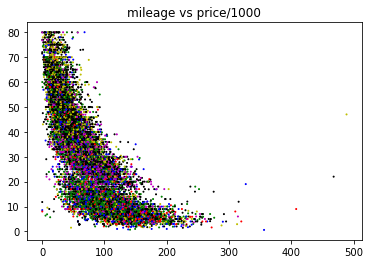

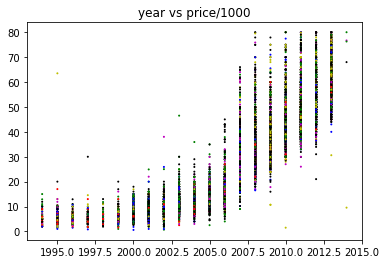

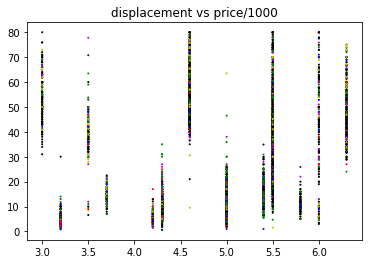

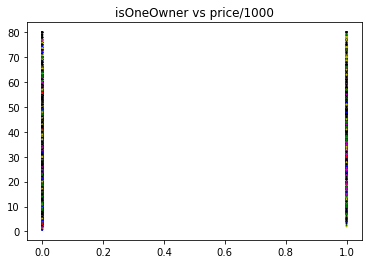

In [26]:
# Visualize numerical features with scatter plots
numerical_features = ['mileage', 'year', 'displacement', 'isOneOwner']
for feature in numerical_features:
    #plt.scatterplot(data=df, x=feature, y='price',)
    plt.scatter(df[feature], df['price'], c = new_color, s = 1)
    plt.title(f'{feature} vs price/1000')
    plt.show()

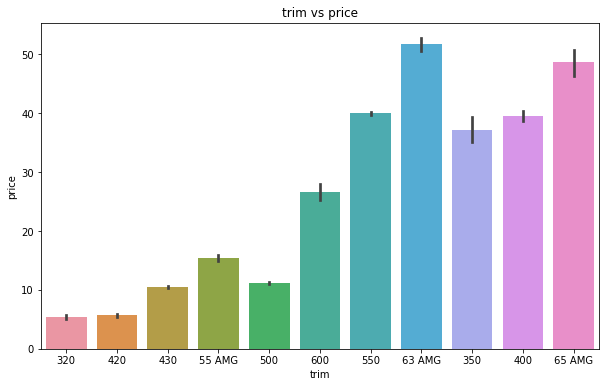

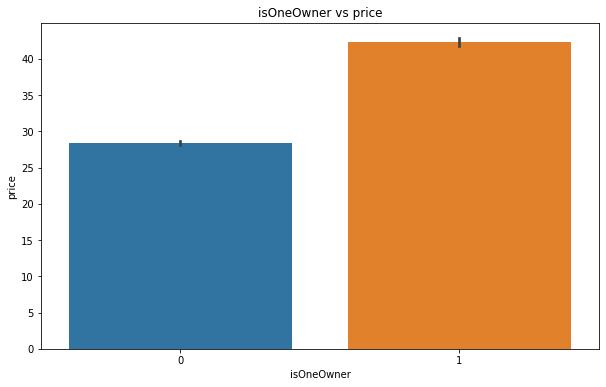

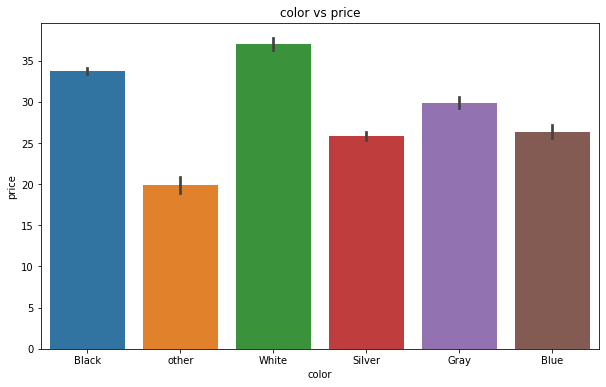

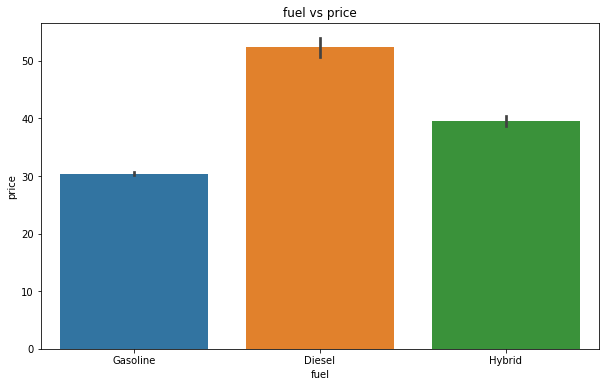

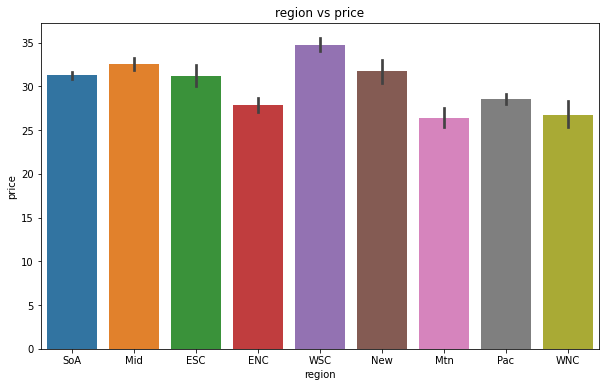

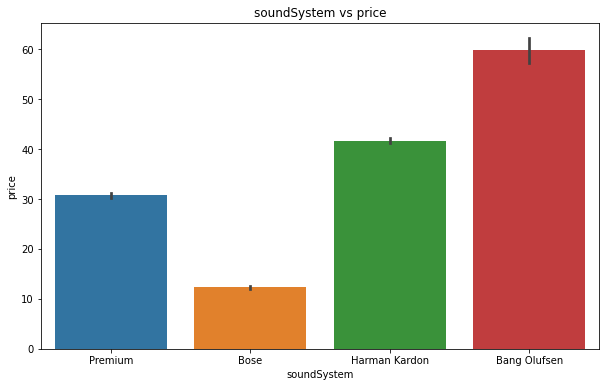

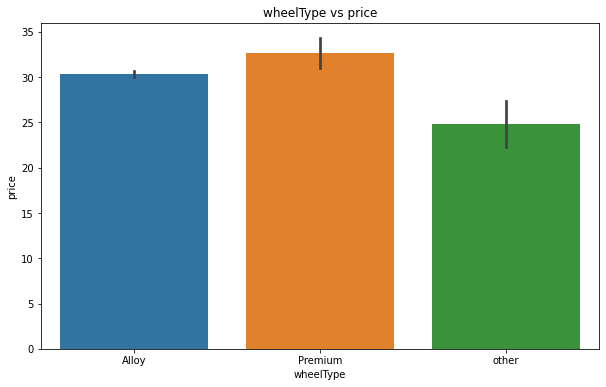

In [27]:
categorical_features = ['trim', 'isOneOwner', 'color', 'fuel', 'region', 'soundSystem', 'wheelType']

for feature in categorical_features:
  plt.figure(figsize=(10, 6))
  sns.barplot(data=df, x=feature, y='price')
  plt.title(f'{feature} vs price')
  plt.show()

In [28]:
# Merge one-hot encoded columns with the original dataframe
df = pd.concat([df.drop(categorical_columns, axis=1), ordinal_encoded_df], axis=1)

In [29]:
# Split dataset into features (X) and target (y)
X = df.drop(['price','soundSystem','wheelType'], axis=1)
y = df['price']

In [30]:
# Create a Random Forest regressor and fit it to the data
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [31]:
# Print the feature importance scores
for i, feature in enumerate(X.columns):
    print(f'{feature}: {rf.feature_importances_[i]}')

isOneOwner: 0.002273769359666208
mileage: 0.1485752858187105
year: 0.801931047122102
displacement: 0.006466688057643734
trim: 0.024607217549125947
color: 0.006719440476597272
fuel: 0.0005758163914164866
region: 0.00885073522473793


In [32]:
# Create a Ridge regression estimator and fit it to the data
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

Ridge()

In [33]:
# Perform recursive feature elimination
rfe = RFE(estimator=ridge, n_features_to_select=5, step=1)
rfe.fit(X, y)

RFE(estimator=Ridge(), n_features_to_select=5)

In [34]:
# Print the selected features
selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['isOneOwner', 'year', 'displacement', 'trim', 'fuel'], dtype='object')


In [35]:
from sklearn.feature_selection import SelectKBest, f_regression

# Univariate feature selection
skb = SelectKBest(f_regression, k=5)
skb_start = time.time()
X_new = skb.fit_transform(X, y)
skb_stop = time.time()

print(skb_stop-skb_start)

selected_columns = X.columns[skb.get_support()]
print("Selected columns using SelectKBest:", list(selected_columns))

0.01994943618774414
Selected columns using SelectKBest: ['isOneOwner', 'mileage', 'year', 'displacement', 'trim']


In [36]:
X_final = X[['isOneOwner', 'mileage', 'year', 'displacement', 'trim']]
X_final

,isOneOwner,mileage,year,displacement,trim
0,0,193.296,1995,3.2,0.0
1,0,129.948,1995,3.2,0.0
2,0,140.428,1997,3.2,0.0
3,0,113.622,1999,4.2,3.0
4,0,167.673,1999,4.2,3.0
...,...,...,...,...,...
20058,1,17.181,2013,4.6,7.0
20059,1,53.885,2010,3.5,2.0
20060,0,47.484,2010,3.5,2.0
20061,0,42.972,2010,3.5,2.0


In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [38]:
# Train the linear regression model
model = LinearRegression()
start_linear = time.time()
model.fit(X_train, y_train)
stop_linear = time.time()

print(stop_linear - start_linear)

0.02998805046081543


In [39]:
# Make predictions
y_pred = model.predict(X_test)

In [40]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 45.98
R-squared: 0.86


In [41]:
# Ridge regression
ridge = Ridge(alpha=1)
start_ridge = time.time()
ridge.fit(X_train, y_train)
stop_ridge = time.time()
y_pred_ridge = ridge.predict(X_test)

print(stop_ridge - start_ridge)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Print the results
print("Ridge regression:")
print(f"MSE: {mse_ridge:.2f}, RMSE: {rmse_ridge:.2f}, R-squared: {r2_ridge:.2f}, MAE: {mae_ridge:.2f}")

0.008430004119873047
Ridge regression:
MSE: 45.98, RMSE: 6.78, R-squared: 0.86, MAE: 5.10


In [42]:
# Lasso regression
lasso = Lasso(alpha=0.1)
start_lasso = time.time()
lasso.fit(X_train, y_train)
stop_lasso = time.time()
y_pred_lasso = lasso.predict(X_test)

print(stop_lasso - start_lasso)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

# Print the results
print("\nLasso regression:")
print(f"MSE: {mse_lasso:.2f}, RMSE: {rmse_lasso:.2f}, R-squared: {r2_lasso:.2f}, MAE: {mae_lasso:.2f}")

0.012956380844116211

Lasso regression:
MSE: 46.18, RMSE: 6.80, R-squared: 0.86, MAE: 5.12


In [43]:
# Polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(4), LinearRegression())
start_poly = time.time()
poly_reg.fit(X_train, y_train)
stop_poly = time.time()
y_pred_poly = poly_reg.predict(X_test)

print(stop_poly - start_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

# Print the results
print("\nPolynomial regression:")
print(f"MSE: {mse_poly:.2f}, RMSE: {rmse_poly:.2f}, R-squared: {r2_poly:.2f}, MAE: {mae_poly:.2f}")

0.23286771774291992

Polynomial regression:
MSE: 17.13, RMSE: 4.14, R-squared: 0.95, MAE: 2.93


In [44]:
y1pred =  poly_reg.predict(X_test) # predicting test data
y1_hat = poly_reg.predict(X_train) # predicting train data
e = np.exp # creating an exponential function. got the thought last moment so we did this.

Text(0, 0.5, 'yhat')

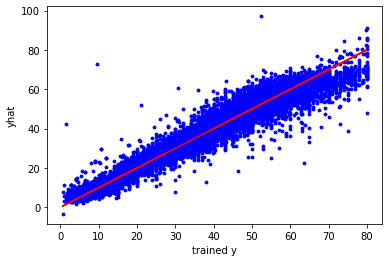

In [45]:
# plotting trained price v/s predicted trained price
plt.scatter(y_train,y1_hat,s=8,c='b')
plt.plot(y_train,y_train,c='red')
plt.xlabel('trained y'); plt.ylabel('yhat')

Text(0, 0.5, 'yhat')

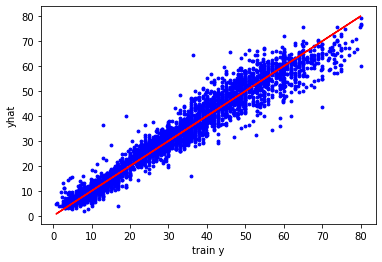

In [46]:
# plotting tested log(price) v/s predicted tested log(price)
plt.scatter(y_test,y1pred,s=8,c='b')
plt.plot(y_test,y_test,c='r')
plt.xlabel('train y'); plt.ylabel('yhat')